# Лабораторная работа №2

**Импорт библиотек**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pydotplus

**Открытие файла**

In [2]:
df = pd.read_excel('2014.xlsx')
df

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions\n(MtCO2e),Direct GHG Emissions\n(MtCO2e),Indirect GHG Emissions\n(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)\n(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,16099,4.084010e+09,NaN,4084010096,4453435,NaN,NaN,Queens,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,966.7,806.6,160.1,91968,NaN,Multifamily Housing,NaN
1,500,1.005050e+09,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013.0,Filed,...,Yes,ABS,44,1392.3,337.9,1054.4,235370,214110.0,Distribution Center,1.0
2,5017,1.021420e+09,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032.0,Filed,...,No,None,Not Available,673.6,541.8,131.8,64806,64816.0,Multifamily Housing,1.0
3,5116,1.021750e+09,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040.0,Filed,...,No,None,Not Available,485,403,82,62839,62847.0,Multifamily Housing,1.0
4,363,1.003360e+09,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002.0,Filed,...,No,None,Not Available,435.5,290,145.5,98000,98052.0,Multifamily Housing,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,12984,1.014809e+09,NaN,NaN,NaN,1174,YORK AVENUE,Manhattan,10065.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,177000.0,NaN,1.0
16166,12987,1.014830e+09,NaN,NaN,NaN,1334,YORK AVENUE,Manhattan,10021.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,407260.0,NaN,1.0
16167,12988,1.014860e+09,NaN,NaN,NaN,1410,YORK AVENUE,Manhattan,10021.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,54096.0,NaN,1.0
16168,13472,2.036190e+09,NaN,NaN,NaN,750,ZEREGA AVENUE,Bronx,10473.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,224603.0,NaN,1.0


**Выборка столбцов**

In [3]:
df_sample = df[['BBLs Co-reported', 'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)', 'Zip Code', 'Borough', 
               'Street Name', 'Reported NYC Building Identificaiton Numbers (BINs)', 'ENERGY STAR Score']]
df_sample

,BBLs Co-reported,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Zip Code,Borough,Street Name,Reported NYC Building Identificaiton Numbers (BINs),ENERGY STAR Score
0,4084010096,Not Available,NaN,Queens,NaN,4453435,Not Available
1,1005050001,8.71,10013.0,Manhattan,VARICK STREET,1007817,44
2,1021420100,Not Available,10032.0,Manhattan,BROADWAY,1063495,Not Available
3,1021750080,Not Available,10040.0,Manhattan,SHERMAN AVENUE,1064235,Not Available
4,1003360005,Not Available,10002.0,Manhattan,BIALYSTOKER PLACE,1088884,Not Available
...,...,...,...,...,...,...,...
16165,NaN,NaN,10065.0,Manhattan,YORK AVENUE,NaN,NaN
16166,NaN,NaN,10021.0,Manhattan,YORK AVENUE,NaN,NaN
16167,NaN,NaN,10021.0,Manhattan,YORK AVENUE,NaN,NaN
16168,NaN,NaN,10473.0,Bronx,ZEREGA AVENUE,NaN,NaN


**Drop лишних значений из целевой переменной**

In [4]:
df_sample = df_sample.drop(df_sample[df_sample['ENERGY STAR Score'] == 'Not Available'].index)
df_sample = df_sample.drop(df_sample[df_sample['ENERGY STAR Score'] == 'See Primary BBL'].index)
df_sample = df_sample.dropna(subset=['ENERGY STAR Score'])
df_sample

,BBLs Co-reported,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Zip Code,Borough,Street Name,Reported NYC Building Identificaiton Numbers (BINs),ENERGY STAR Score
1,1005050001,8.71,10013.0,Manhattan,VARICK STREET,1007817,44
5,2040830013,Not Available,10461.0,Bronx,JARRETT PLACE,2044217,98
7,1-00807-0028,22.89,10001.0,Manhattan,WEST 31 STREET,1015181,57
11,1-01209-00148,Not Available,NaN,Manhattan,NaN,1031751,100
15,1012920048,8.77,10022.0,Manhattan,EAST 57 STREET,1035788,74
...,...,...,...,...,...,...,...
13768,Not Available,17.21,NaN,Brooklyn,NaN,Not Available,65
13772,Not Available,Not Available,NaN,Brooklyn,NaN,Not Available,29
13773,Not Available,Not Available,NaN,Brooklyn,NaN,Not Available,84
13778,Not Available,Not Available,NaN,Queens,NaN,Not Available,98


**Обработка данных о воде**

In [5]:
df_sample = df_sample.drop(df_sample[df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'] == 'Not Available'].index)
df_sample = df_sample.drop(df_sample[df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'] == 'See Primary BBL'].index)

In [6]:
df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'].median()

18.835

In [7]:
df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'] = df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'].fillna(18.84)
df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)']

1          8.71
7         22.89
15         8.77
17        62.18
39       117.05
          ...  
13692     23.48
13718     27.89
13755     27.46
13767     33.15
13768     17.21
Name: Municipally Supplied Potable Water - Indoor Intensity (gal/ft²), Length: 668, dtype: object

**Обработка данных о районах**

In [8]:
df_sample['Borough'].value_counts()

Manhattan        428
Queens            97
Brooklyn          90
Bronx             39
Staten Island     14
Name: Borough, dtype: int64

In [9]:
df_sample['Borough'] = df_sample['Borough'].fillna('Manhattan')
df_sample['Borough']

1            Manhattan
7            Manhattan
15           Manhattan
17           Manhattan
39               Bronx
             ...      
13692    Staten Island
13718    Staten Island
13755        Manhattan
13767         Brooklyn
13768         Brooklyn
Name: Borough, Length: 668, dtype: object

**Обработка данных о улицах**

In [10]:
df_sample['Street Name'].value_counts()

BROADWAY            39
5 AVENUE            26
MADISON AVENUE      19
UTOPIA PARKWAY      15
3 AVENUE            13
                    ..
EASTCHESTER ROAD     1
ELY AVENUE           1
ALLERTON AVENUE      1
BARNES AVENUE        1
YORK STREET          1
Name: Street Name, Length: 267, dtype: int64

In [11]:
df_sample['Street Name'] = df_sample['Street Name'].fillna('BROADWAY')
df_sample['Street Name']

1            VARICK STREET
7         WEST   31 STREET
15        EAST   57 STREET
17        EAST   42 STREET
39       BAYCHESTER AVENUE
               ...        
13692             BROADWAY
13718             BROADWAY
13755             BROADWAY
13767             BROADWAY
13768             BROADWAY
Name: Street Name, Length: 668, dtype: object

**Отбрасывание неинформативных колонок**

In [12]:
df_sample = df_sample.drop(['BBLs Co-reported', 'Zip Code', 'Reported NYC Building Identificaiton Numbers (BINs)'], axis=1)
df_sample

,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Borough,Street Name,ENERGY STAR Score
1,8.71,Manhattan,VARICK STREET,44
7,22.89,Manhattan,WEST 31 STREET,57
15,8.77,Manhattan,EAST 57 STREET,74
17,62.18,Manhattan,EAST 42 STREET,13
39,117.05,Bronx,BAYCHESTER AVENUE,100
...,...,...,...,...
13692,23.48,Staten Island,BROADWAY,46
13718,27.89,Staten Island,BROADWAY,99
13755,27.46,Manhattan,BROADWAY,46
13767,33.15,Brooklyn,BROADWAY,72


**Разбиение районов с помощью one code encoding**

In [13]:
df_sample = pd.get_dummies(df_sample, columns=['Borough'])
df_sample

,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Street Name,ENERGY STAR Score,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island
1,8.71,VARICK STREET,44,0,0,1,0,0
7,22.89,WEST 31 STREET,57,0,0,1,0,0
15,8.77,EAST 57 STREET,74,0,0,1,0,0
17,62.18,EAST 42 STREET,13,0,0,1,0,0
39,117.05,BAYCHESTER AVENUE,100,1,0,0,0,0
...,...,...,...,...,...,...,...,...
13692,23.48,BROADWAY,46,0,0,0,0,1
13718,27.89,BROADWAY,99,0,0,0,0,1
13755,27.46,BROADWAY,46,0,0,1,0,0
13767,33.15,BROADWAY,72,0,1,0,0,0


**Разбиение улиц с помощью one code encoding**

In [14]:
df_sample = pd.get_dummies(df_sample, columns=['Street Name'])
df_sample

,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),ENERGY STAR Score,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Street Name_ 39 AVENUE,Street Name_1 AVENUE,Street Name_10 AVENUE,...,Street Name_WESTCHESTER AVENUE,Street Name_WHITE PLAINS ROAD,Street Name_WHITEHALL STREET,Street Name_WILLIAM STREET,Street Name_WILLOUGHBY AVENUE,Street Name_WILLOUGHBY STREET,Street Name_WILLOW STREET,Street Name_WORTH STREET,Street Name_YORK STREET,Street Name_ZEREGA AVENUE
1,8.71,44,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22.89,57,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,8.77,74,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,62.18,13,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,117.05,100,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13692,23.48,46,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13718,27.89,99,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13755,27.46,46,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13767,33.15,72,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Проверка типов данных**

In [15]:
df_sample.dtypes

Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)    object
ENERGY STAR Score                                                  object
Borough_Bronx                                                       uint8
Borough_Brooklyn                                                    uint8
Borough_Manhattan                                                   uint8
                                                                    ...  
Street Name_WILLOUGHBY STREET                                       uint8
Street Name_WILLOW STREET                                           uint8
Street Name_WORTH STREET                                            uint8
Street Name_YORK STREET                                             uint8
Street Name_ZEREGA AVENUE                                           uint8
Length: 274, dtype: object

**Исправление типа объект для воды**

In [16]:
df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'] = df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'].astype('float')
df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'] 

1          8.71
7         22.89
15         8.77
17        62.18
39       117.05
          ...  
13692     23.48
13718     27.89
13755     27.46
13767     33.15
13768     17.21
Name: Municipally Supplied Potable Water - Indoor Intensity (gal/ft²), Length: 668, dtype: float64

**Нормализация данных о воде**

In [17]:
data_numerical = df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)']
df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'] = (data_numerical - data_numerical.mean()) / data_numerical.std()
df_sample['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)']

1       -0.111995
7       -0.086101
15      -0.111885
17      -0.014355
39       0.085841
           ...   
13692   -0.085024
13718   -0.076971
13755   -0.077756
13767   -0.067366
13768   -0.096473
Name: Municipally Supplied Potable Water - Indoor Intensity (gal/ft²), Length: 668, dtype: float64

**Исправление типа объект для целевой переменной**

In [18]:
df_sample['ENERGY STAR Score'] = df_sample['ENERGY STAR Score'].astype('int')
df_sample['ENERGY STAR Score'] 

1         44
7         57
15        74
17        13
39       100
        ... 
13692     46
13718     99
13755     46
13767     72
13768     65
Name: ENERGY STAR Score, Length: 668, dtype: int32

**Итоговый вид таблицы**

In [19]:
df_sample

,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),ENERGY STAR Score,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Street Name_ 39 AVENUE,Street Name_1 AVENUE,Street Name_10 AVENUE,...,Street Name_WESTCHESTER AVENUE,Street Name_WHITE PLAINS ROAD,Street Name_WHITEHALL STREET,Street Name_WILLIAM STREET,Street Name_WILLOUGHBY AVENUE,Street Name_WILLOUGHBY STREET,Street Name_WILLOW STREET,Street Name_WORTH STREET,Street Name_YORK STREET,Street Name_ZEREGA AVENUE
1,-0.111995,44,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-0.086101,57,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,-0.111885,74,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,-0.014355,13,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0.085841,100,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13692,-0.085024,46,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13718,-0.076971,99,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13755,-0.077756,46,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13767,-0.067366,72,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Карта зависимостей признаков**

In [20]:
df_sample.corr()

,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),ENERGY STAR Score,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Street Name_ 39 AVENUE,Street Name_1 AVENUE,Street Name_10 AVENUE,...,Street Name_WESTCHESTER AVENUE,Street Name_WHITE PLAINS ROAD,Street Name_WHITEHALL STREET,Street Name_WILLIAM STREET,Street Name_WILLOUGHBY AVENUE,Street Name_WILLOUGHBY STREET,Street Name_WILLOW STREET,Street Name_WORTH STREET,Street Name_YORK STREET,Street Name_ZEREGA AVENUE
Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),1.000000,-0.060538,-0.011418,-0.022460,-0.042581,0.091088,-0.009185,-0.000798,-0.001406,-0.004163,...,-0.003973,0.001507,-0.005860,0.007712,-0.004645,-0.003408,-0.003065,-0.003103,0.002038,-0.006561
ENERGY STAR Score,-0.060538,1.000000,-0.047432,-0.114290,0.193253,-0.132537,0.028743,-0.010233,-0.011514,-0.068849,...,0.010260,-0.019014,-0.013576,-0.072991,0.013614,0.035875,-0.006390,-0.072991,-0.061464,-0.034421
Borough_Bronx,-0.011418,-0.047432,1.000000,-0.098257,-0.332524,-0.102630,-0.036432,-0.009641,-0.009641,-0.016725,...,0.155500,0.220075,-0.013645,-0.009641,-0.013645,-0.009641,-0.009641,-0.009641,-0.009641,0.220075
Borough_Brooklyn,-0.022460,-0.114290,-0.098257,1.000000,-0.526955,-0.162639,-0.057734,-0.015279,-0.015279,-0.026504,...,-0.015279,-0.021624,-0.021624,-0.015279,0.138874,0.098125,0.098125,-0.015279,-0.015279,-0.021624
Borough_Manhattan,-0.042581,0.193253,-0.332524,-0.526955,1.000000,-0.550407,-0.195385,-0.051707,0.028995,0.050296,...,-0.051707,-0.073180,0.041036,0.028995,-0.073180,-0.051707,-0.051707,0.028995,0.028995,-0.073180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Street Name_WILLOUGHBY STREET,-0.003408,0.035875,-0.009641,0.098125,-0.051707,-0.015959,-0.005665,-0.001499,-0.001499,-0.002601,...,-0.001499,-0.002122,-0.002122,-0.001499,-0.002122,1.000000,-0.001499,-0.001499,-0.001499,-0.002122
Street Name_WILLOW STREET,-0.003065,-0.006390,-0.009641,0.098125,-0.051707,-0.015959,-0.005665,-0.001499,-0.001499,-0.002601,...,-0.001499,-0.002122,-0.002122,-0.001499,-0.002122,-0.001499,1.000000,-0.001499,-0.001499,-0.002122
Street Name_WORTH STREET,-0.003103,-0.072991,-0.009641,-0.015279,0.028995,-0.015959,-0.005665,-0.001499,-0.001499,-0.002601,...,-0.001499,-0.002122,-0.002122,-0.001499,-0.002122,-0.001499,-0.001499,1.000000,-0.001499,-0.002122
Street Name_YORK STREET,0.002038,-0.061464,-0.009641,-0.015279,0.028995,-0.015959,-0.005665,-0.001499,-0.001499,-0.002601,...,-0.001499,-0.002122,-0.002122,-0.001499,-0.002122,-0.001499,-0.001499,-0.001499,1.000000,-0.002122


**Разбиение данных на тестовые и тренировачные**

In [21]:
energy_score = df_sample['ENERGY STAR Score']
data = df_sample.drop(['ENERGY STAR Score'], axis=1)

feature_names = data.columns

data_train, data_test, energy_train, energy_test = train_test_split(data, energy_score, test_size=0.3, random_state=10)

**Создание модели линейной регресси**

In [22]:
reg = LinearRegression()
reg.fit(data_train, energy_train)

print('Train score: ', reg.score(data_train, energy_train))
print('Test score: ', reg.score(data_test, energy_test))

print('Intercept', reg.intercept_)
pd.DataFrame(data=reg.coef_, index=data_train.columns, columns=['Factor'])

Train score:  0.6111954906126583
Test score:  -2.0274714125233274e+26
Intercept 73412660736475.5


,Factor
Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),-3.822582e+00
Borough_Bronx,-6.024375e+13
Borough_Brooklyn,-6.024375e+13
Borough_Manhattan,-6.024375e+13
Borough_Queens,-6.024375e+13
...,...
Street Name_WILLOUGHBY STREET,-1.316891e+13
Street Name_WILLOW STREET,0.000000e+00
Street Name_WORTH STREET,0.000000e+00
Street Name_YORK STREET,0.000000e+00


**Тест предсказания**

In [23]:
energy_pred = reg.predict(data_test)
print('Prediction: ', energy_pred)

Prediction:  [ 5.90000000e+01  7.55312500e+01  8.45937500e+01  3.68718928e+13
  5.90625000e+01  1.31689088e+13  5.80625000e+01  1.31689088e+13
  1.19706866e+14  5.83906250e+01  5.90312500e+01  6.35937500e+00
  1.67343750e+01  2.18125000e+01  1.67343750e+01  9.02343750e+01
  7.52091402e+14  1.23168116e+14  5.82500000e+01  8.42812500e+01
  8.45312500e+01  6.50625000e+01  5.09375000e+00  2.03750000e+01
  7.82968750e+01  3.62500000e+01  6.30156250e+01  8.70156250e+01
 -4.73880953e+14  6.52500000e+01  1.31689088e+13  3.62656250e+01
  5.86718750e+01  6.08437500e+01  1.31689088e+13  1.03951416e+14
  5.85625000e+01  3.62500000e+01  5.86562500e+01  6.08437500e+01
  6.65625000e+01  5.85468750e+01  2.82500000e+01  6.56875000e+01
  3.60156250e+01  5.66562500e+01  5.86875000e+01  3.92968750e+01
  1.40625000e+01  5.80937500e+01 -1.42312800e+15 -7.15762665e+13
  6.04687500e+01  5.90937500e+01  3.11093750e+01  2.09511255e+15
  6.37031250e+01  8.37187500e+01  5.55625000e+01  1.65000000e+01
  5.54843750

In [24]:
energy_test.value_counts()

1      15
85      8
100     7
72      5
16      5
       ..
94      1
11      1
28      1
38      1
36      1
Name: ENERGY STAR Score, Length: 80, dtype: int64

**Среднеквадратическая ошибка модели**

In [25]:
mean_squared_error(energy_pred, energy_test)

1.998206490391661e+29

# Лабораторная работа №3

**Дерево решений**

In [26]:
df_tree = df_sample
df_tree

,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),ENERGY STAR Score,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Street Name_ 39 AVENUE,Street Name_1 AVENUE,Street Name_10 AVENUE,...,Street Name_WESTCHESTER AVENUE,Street Name_WHITE PLAINS ROAD,Street Name_WHITEHALL STREET,Street Name_WILLIAM STREET,Street Name_WILLOUGHBY AVENUE,Street Name_WILLOUGHBY STREET,Street Name_WILLOW STREET,Street Name_WORTH STREET,Street Name_YORK STREET,Street Name_ZEREGA AVENUE
1,-0.111995,44,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-0.086101,57,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,-0.111885,74,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,-0.014355,13,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0.085841,100,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13692,-0.085024,46,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13718,-0.076971,99,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13755,-0.077756,46,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13767,-0.067366,72,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Обработка данных**

In [27]:
df_tree.loc[df_tree['ENERGY STAR Score'] < 70, 'ENERGY STAR Score'] = 0
df_tree.loc[df_tree['ENERGY STAR Score'] > 70, 'ENERGY STAR Score'] = 1
df_tree

,Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),ENERGY STAR Score,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Street Name_ 39 AVENUE,Street Name_1 AVENUE,Street Name_10 AVENUE,...,Street Name_WESTCHESTER AVENUE,Street Name_WHITE PLAINS ROAD,Street Name_WHITEHALL STREET,Street Name_WILLIAM STREET,Street Name_WILLOUGHBY AVENUE,Street Name_WILLOUGHBY STREET,Street Name_WILLOW STREET,Street Name_WORTH STREET,Street Name_YORK STREET,Street Name_ZEREGA AVENUE
1,-0.111995,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-0.086101,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,-0.111885,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,-0.014355,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0.085841,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13692,-0.085024,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13718,-0.076971,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13755,-0.077756,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13767,-0.067366,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Разбиение данных на тестовые и тренировочные**

In [28]:
tree_score = df_tree['ENERGY STAR Score']
tree_data = df_tree.drop(['ENERGY STAR Score'], axis=1)
tree_data_train, tree_data_test, tree_energy_train, tree_energy_test = train_test_split(tree_data, tree_score, test_size=0.2, random_state=10)

**Создание модели дерева решений**

In [29]:
tree = DecisionTreeClassifier()

tree = tree.fit(tree_data_train, tree_energy_train)

tree_pred = tree.predict(tree_data_test)

print('Train score: ', tree.score(tree_data_train, tree_energy_train))
print('Test score: ', tree.score(tree_data_test, tree_energy_test))

Train score:  0.99812734082397
Test score:  0.6791044776119403


**Графическое отображение дерева решений**

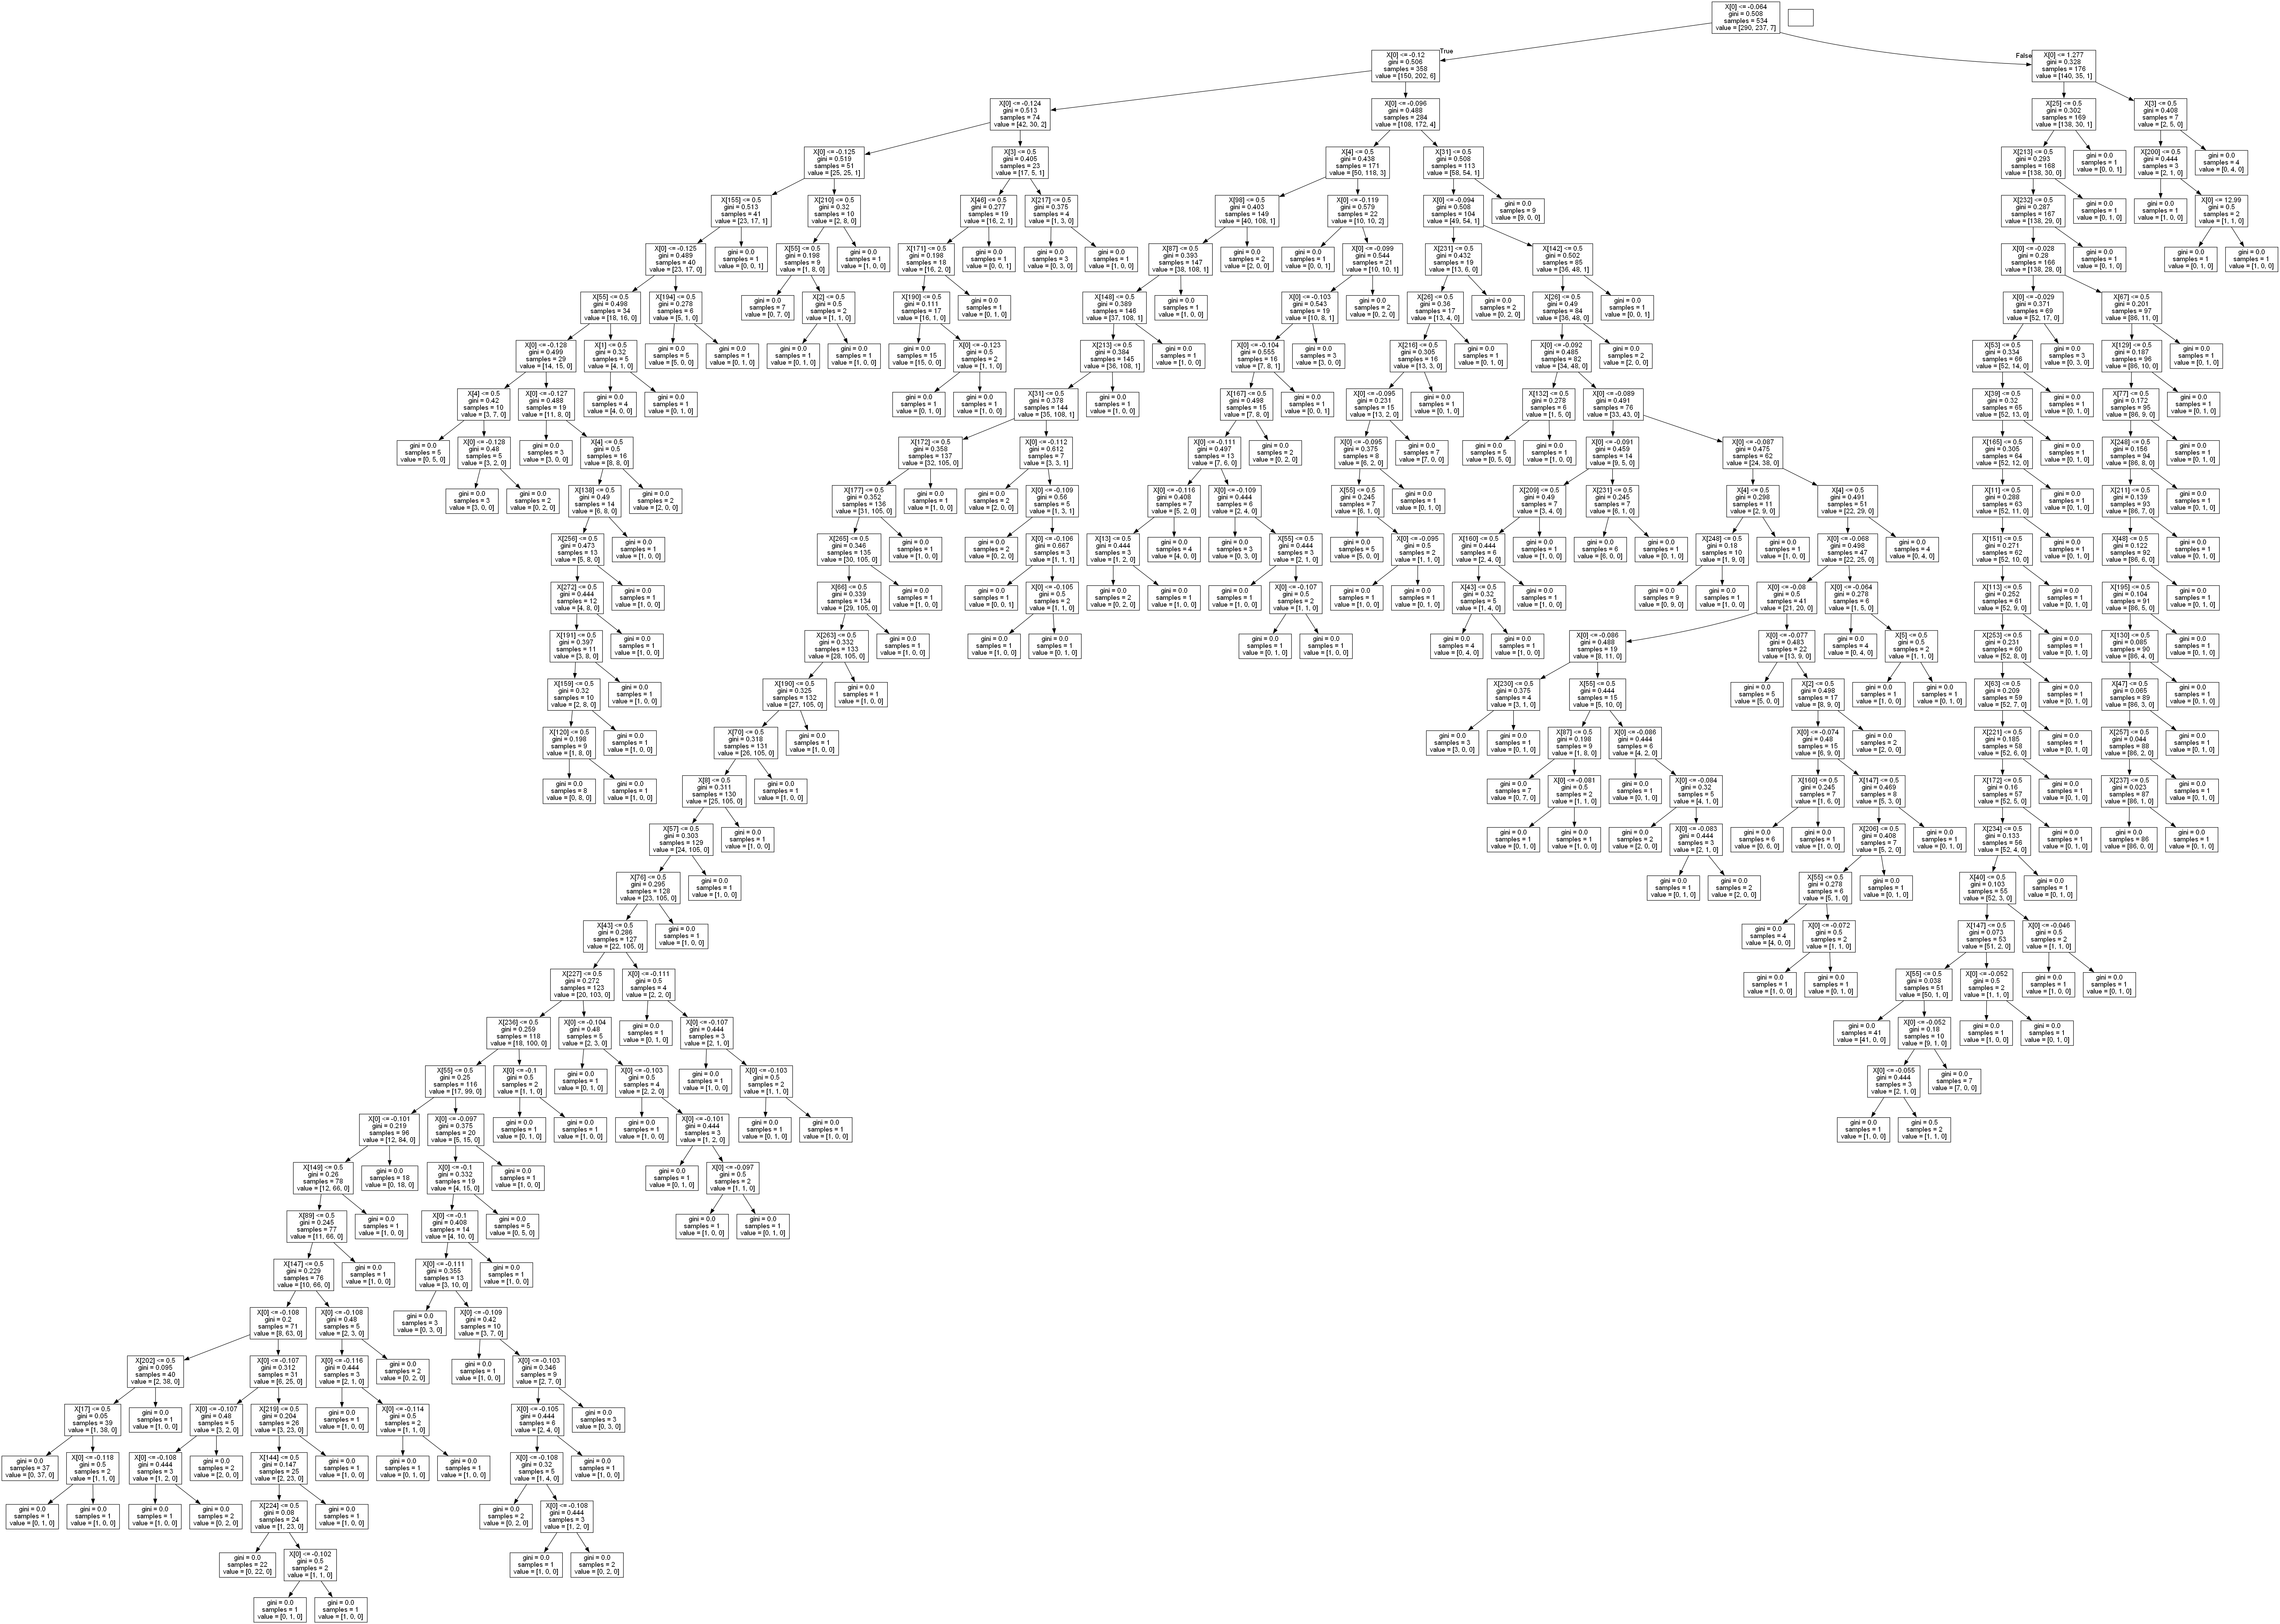

In [30]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Tree_Energy.png')
Image(graph.create_png())

**Подготовка данных при новом условии**

In [31]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20)

tree = tree.fit(tree_data_train, tree_energy_train)

tree_pred = tree.predict(tree_data_test)

print('Train score: ', tree.score(tree_data_train, tree_energy_train))
print('Test score: ', tree.score(tree_data_test, tree_energy_test))

Train score:  0.8370786516853933
Test score:  0.6343283582089553


**Графическое отображение нового дерева**

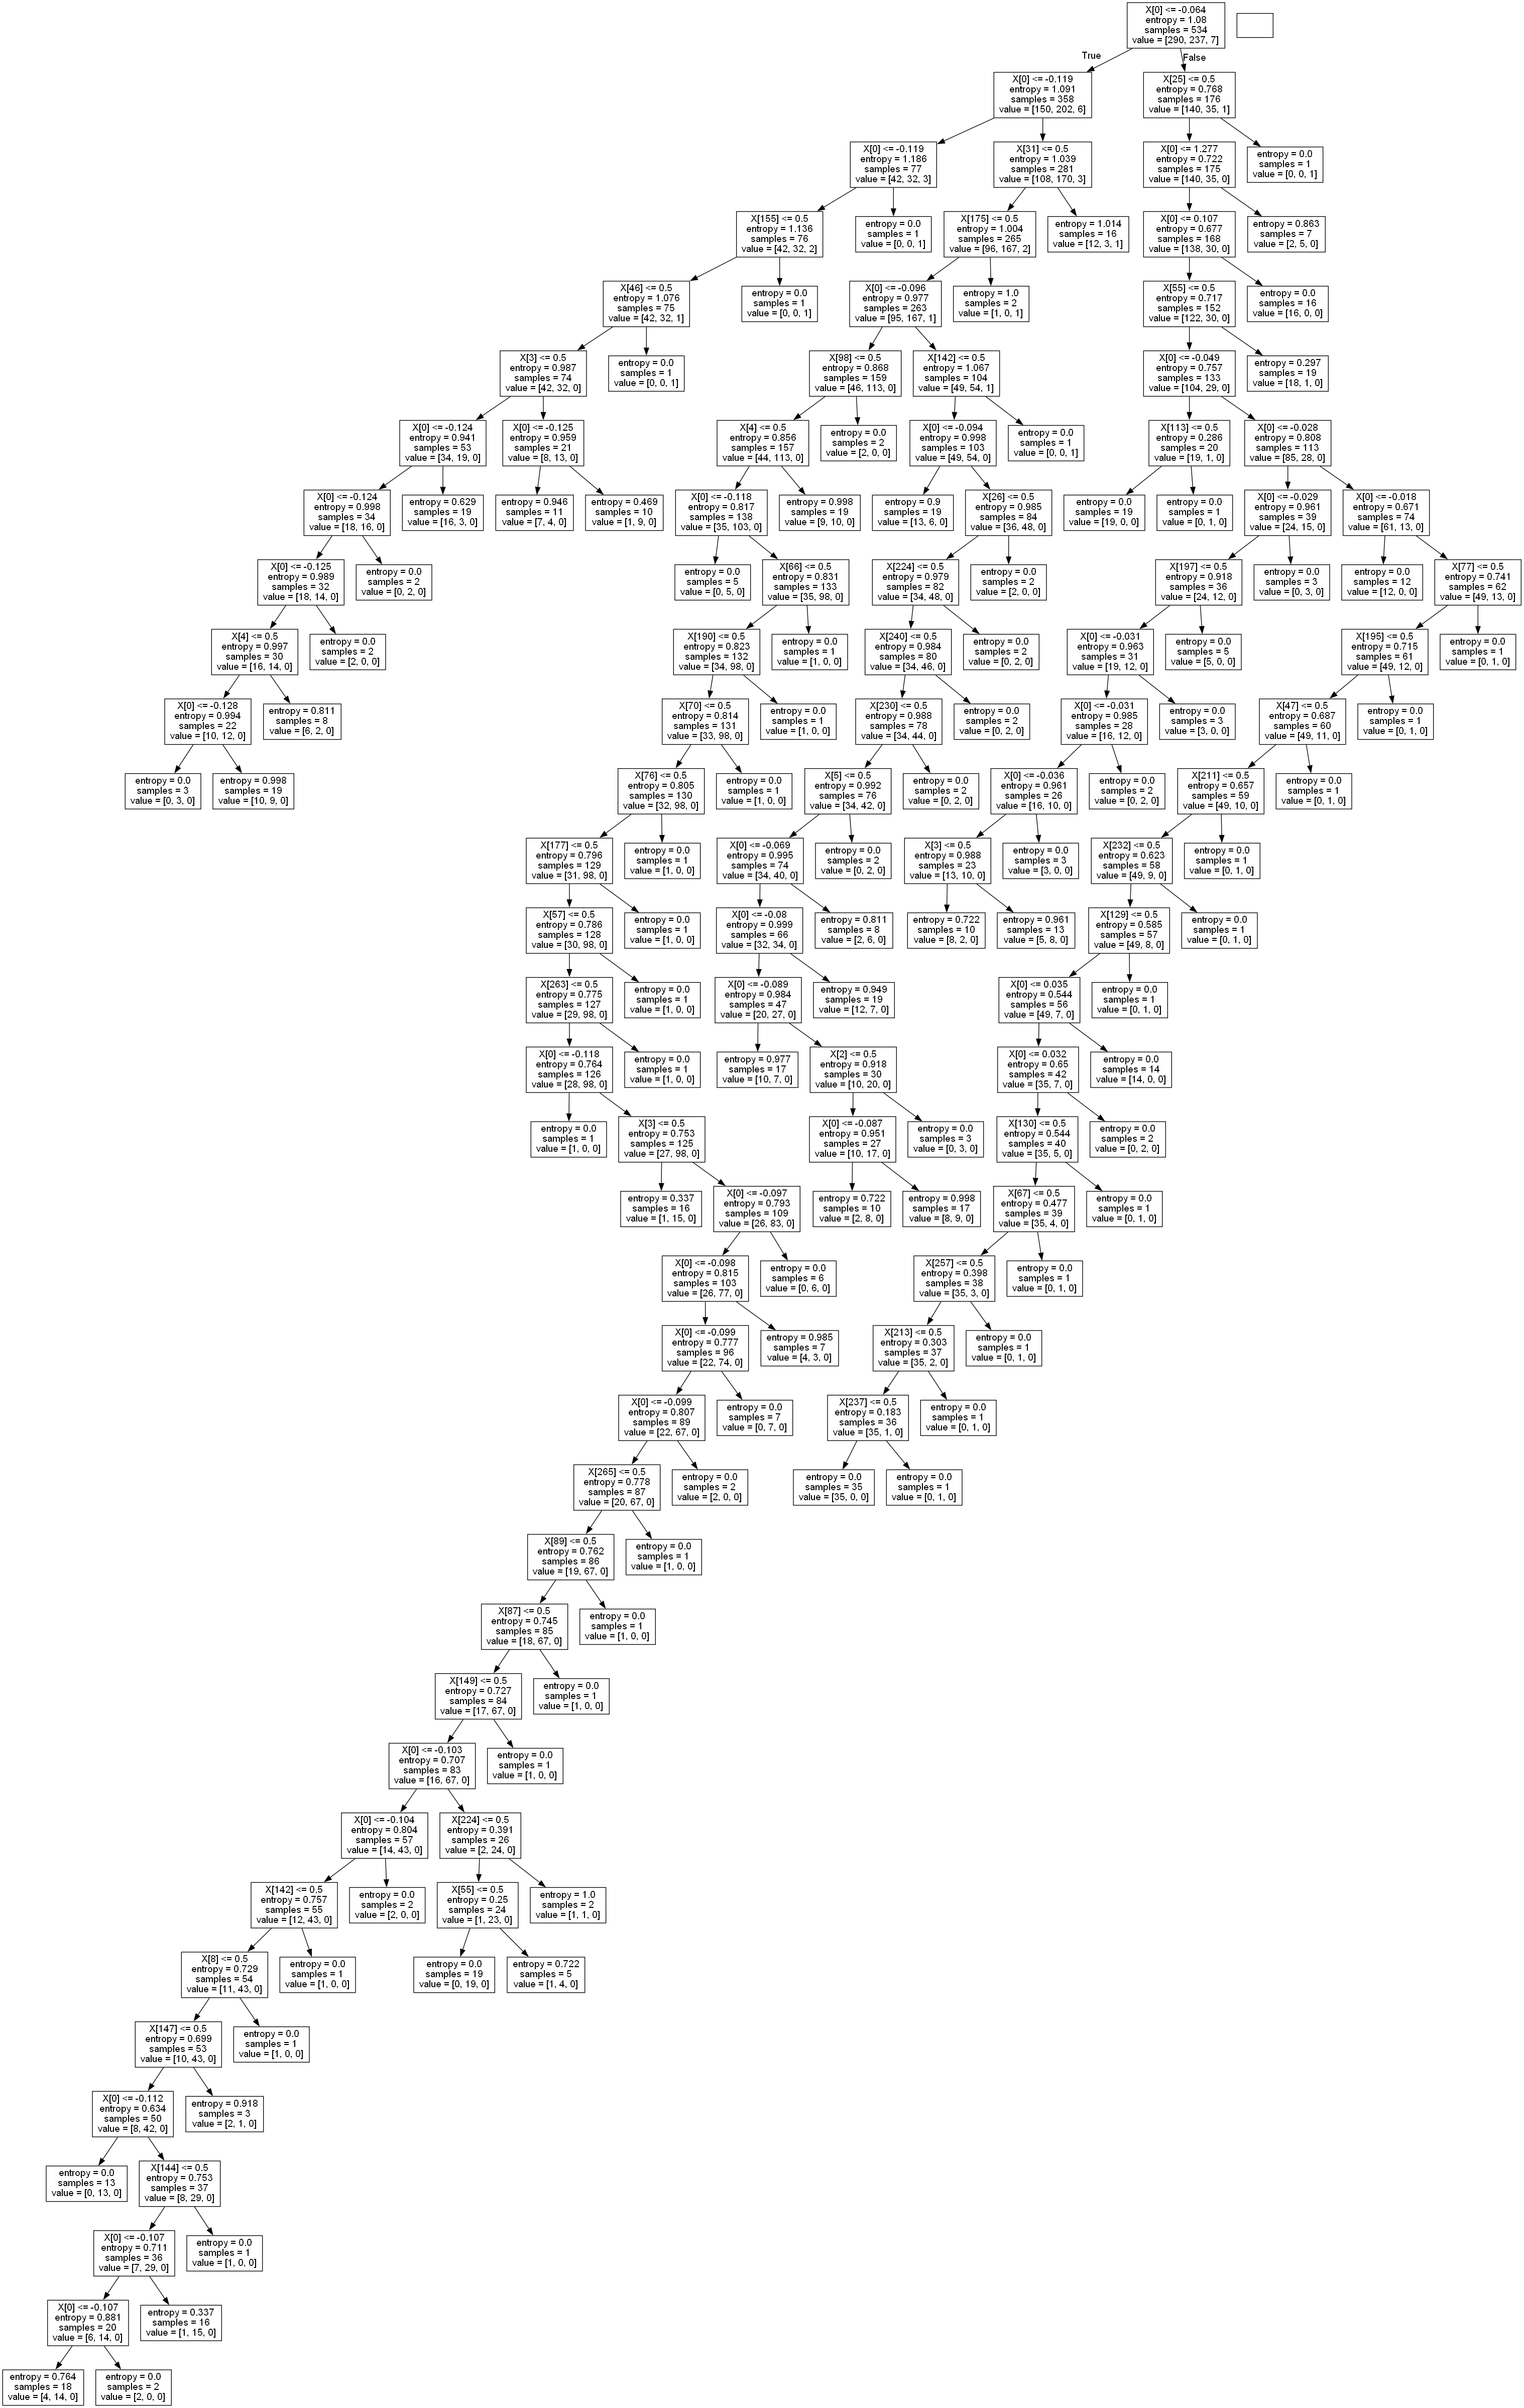

In [32]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Tree_Energy_V2.png')
Image(graph.create_png())

**Случайный лес**

In [33]:
forest_data_train, forest_data_test, forest_score_train, forest_score_test = train_test_split(tree_data, tree_score, test_size=0.2, random_state=10)

**Разбиение данных на тестовые и тренировочные**

In [34]:
forest = RandomForestClassifier(n_estimators=100)

forest.fit(forest_data_train, forest_score_train)

forest_pred = forest.predict(forest_data_test)

print('Train score: ', forest.score(forest_data_train, forest_score_train))
print('Test score: ', forest.score(forest_data_test, forest_score_test))

Train score:  0.99812734082397
Test score:  0.7089552238805971


**Список значимости признаков**

In [35]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)' (0.4534)
 2. feature 'Street Name_5 AVENUE' (0.0138)
 3. feature 'Street Name_BROADWAY' (0.0134)
 4. feature 'Borough_Queens' (0.0104)
 5. feature 'Borough_Manhattan' (0.0102)
 6. feature 'Street Name_MADISON AVENUE' (0.0094)
 7. feature 'Street Name_WEST   36 STREET' (0.0088)
 8. feature 'Borough_Brooklyn' (0.0085)
 9. feature 'Street Name_WEST   35 STREET' (0.0079)
10. feature 'Street Name_WEST   38 STREET' (0.0078)
11. feature 'Street Name_WEST   14 STREET' (0.0074)
12. feature 'Street Name_WEST   57 STREET' (0.0067)
13. feature 'Borough_Staten Island' (0.0064)
14. feature 'Street Name_3 AVENUE' (0.0063)
15. feature 'Street Name_QUEENS BOULEVARD' (0.0062)
16. feature 'Street Name_135 STREET' (0.0062)
17. feature 'Street Name_RIVERSIDE DRIVE' (0.0061)
18. feature 'Street Name_EAST   67 STREET' (0.0061)
19. feature 'Street Name_MORNINGSIDE DRIVE' (0.0058)
20. feature 'Street Name_UTOPIA 

**Графическое отображение значимости признаков**

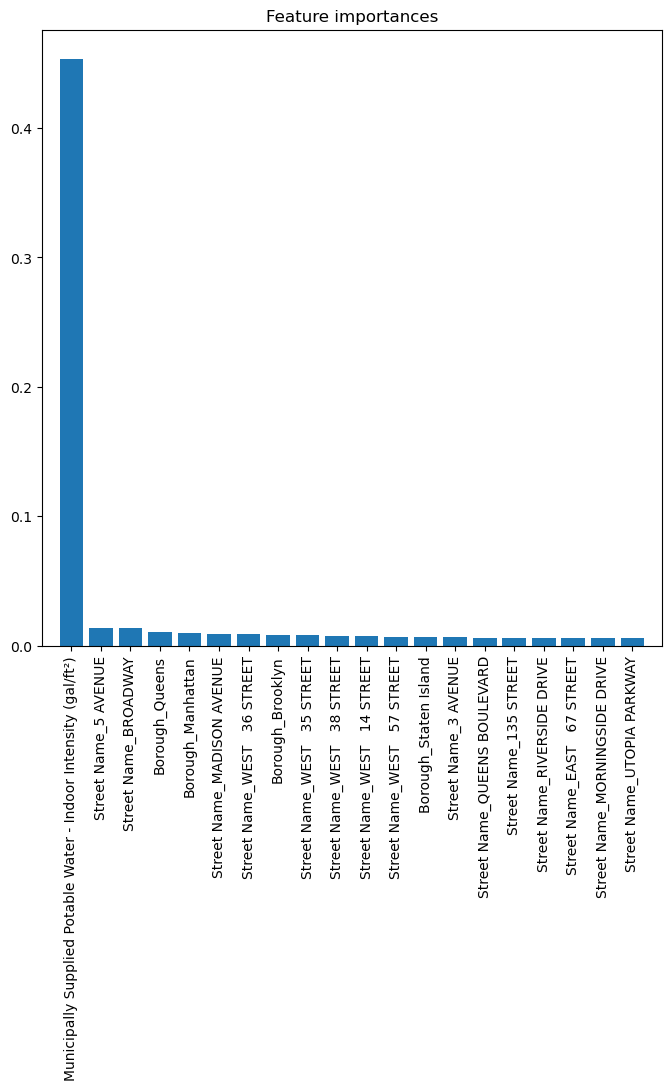

In [36]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

**Подготовка данных при новом условии**

In [37]:
forest = RandomForestClassifier(n_estimators=100, min_samples_split=20)

forest.fit(forest_data_train, forest_score_train)

forest_pred = forest.predict(forest_data_test)

print('Train score: ', forest.score(forest_data_train, forest_score_train))
print('Test score: ', forest.score(forest_data_test, forest_score_test))

Train score:  0.8689138576779026
Test score:  0.753731343283582


**Таблица важности признаков для нового леса**

In [38]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)' (0.2908)
 2. feature 'Street Name_5 AVENUE' (0.0176)
 3. feature 'Street Name_WEST   36 STREET' (0.0146)
 4. feature 'Borough_Manhattan' (0.0143)
 5. feature 'Street Name_BROADWAY' (0.0135)
 6. feature 'Street Name_MADISON AVENUE' (0.0135)
 7. feature 'Street Name_WEST   35 STREET' (0.0132)
 8. feature 'Borough_Queens' (0.0120)
 9. feature 'Street Name_WEST   38 STREET' (0.0116)
10. feature 'Street Name_WEST   57 STREET' (0.0099)
11. feature 'Street Name_WEST   14 STREET' (0.0093)
12. feature 'Street Name_RIVERSIDE DRIVE' (0.0092)
13. feature 'Borough_Staten Island' (0.0082)
14. feature 'Street Name_WEST   37 STREET' (0.0081)
15. feature 'Street Name_EAST   67 STREET' (0.0080)
16. feature 'Street Name_UTOPIA PARKWAY' (0.0079)
17. feature 'Street Name_MORNINGSIDE DRIVE' (0.0075)
18. feature 'Street Name_WEST   42 STREET' (0.0073)
19. feature 'Borough_Brooklyn' (0.0072)
20. feature 'Street 

**Графическое отображение важности признаков для нового леса**

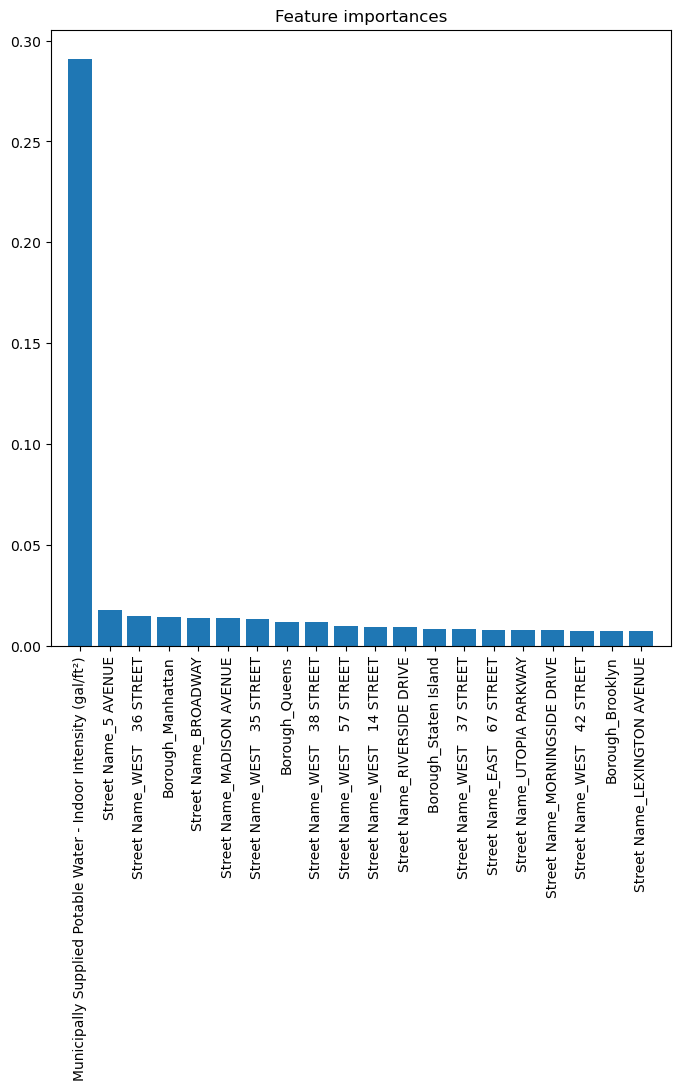

In [39]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);